In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import time
#define a function that returnds the duration of an outbreak with reproduction value,R0
def ndays(R0):
    mu = 0.1
    beta = R0*mu/1000
    S = 10**3 - 1
    I = 1 #start I at 1 not 5
    t = 0
    #stop when t>6000 as we're only interested in the probabilities below 6000
    while I > 0 and t<=6001:

        r1 = np.random.uniform(0, 1, 1)
        totalRate = beta*I*S + mu*I
        t = t - (1/totalRate)*np.log(r1)

        r2 = np.random.uniform(0, 1, 1)
        if r2 < beta*I*S/totalRate:
            S = S - 1
            I = I + 1
        else:
            I = I - 1
            S = S + 1
    return(t)

In [2]:
#I then created an array for each outbreak, storing the duration over 1000 trials
nofsamples=1000
samples08=np.array([])
for n in range(0,nofsamples):
    samples08=np.append(samples08,ndays(0.8))


In [3]:
samples101=np.array([])
for n in range(0,nofsamples):
    samples101=np.append(samples101,ndays(1.01))

In [4]:
samples11=np.array([])
for n in range(0,nofsamples):
    samples11=np.append(samples11,ndays(1.1))

In [5]:
samples13=np.array([])
for n in range(0,nofsamples):
    samples13=np.append(samples13,ndays(1.3))

In [6]:
samples16=np.array([])
for n in range(0,nofsamples):
    samples16=np.append(samples16,ndays(1.6))

In [7]:
samples2=np.array([])
for n in range(0,nofsamples):
    samples2=np.append(samples2,ndays(2))

In [8]:
#I then defined a function that estimates the probability of an outbreak persisting for m days given the sample of that outbreaks duration
def prob(samples,m):
    count=0
    for k in range(0,len(samples)):
        if samples[k]>=m:
            count+=1
    return count/nofsamples

In [9]:
#I then used this function to define a function that returns
#the probailities of an outbreak persisting for a range of days when given a sample of that outbreak
def probrange(samples):
    probarray=np.array([])
    for m in range(0,6000):
        probarray=np.append(probarray,prob(samples,m))
    return(probarray)
        

<function matplotlib.pyplot.show(close=None, block=None)>

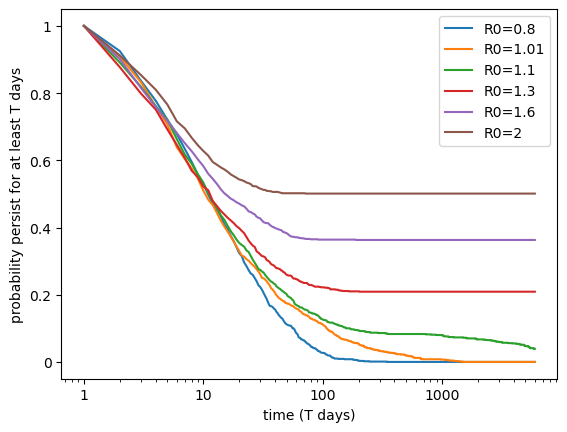

In [10]:
#I then plotted the probabilities over the range of days for the 6 outbreaks
xaxis=np.linspace(1,6000,6000)
xlabels=[0,10,100,1000,6000]
plt.semilogx(xaxis, probrange(samples08), label="R0=0.8")
plt.semilogx(xaxis, probrange(samples101), label="R0=1.01")
plt.semilogx(xaxis, probrange(samples11), label="R0=1.1")
plt.semilogx(xaxis, probrange(samples13), label="R0=1.3")
plt.semilogx(xaxis, probrange(samples16), label="R0=1.6")
plt.semilogx(xaxis, probrange(samples2), label="R0=2")
plt.legend(loc="upper right")
plt.xticks([1,10,100,1000],[1,10,100,1000])
plt.yticks([0,0.2,0.4,0.6,0.8,1],[0,0.2,0.4,0.6,0.8,1])
plt.xlabel('time (T days)')
plt.ylabel('probability persist for at least T days')
plt.show